In [1]:
import pandas as pd

# Replace 'fastfood_calories.csv' with the actual file path if it's not in the current directory.
file_path = 'fastfood_calories.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   515 non-null    int64  
 1   restaurant   515 non-null    object 
 2   item         515 non-null    object 
 3   calories     515 non-null    int64  
 4   cal_fat      515 non-null    int64  
 5   total_fat    515 non-null    int64  
 6   sat_fat      515 non-null    float64
 7   trans_fat    515 non-null    float64
 8   cholesterol  515 non-null    int64  
 9   sodium       515 non-null    int64  
 10  total_carb   515 non-null    int64  
 11  fiber        503 non-null    float64
 12  sugar        515 non-null    int64  
 13  protein      514 non-null    float64
 14  vit_a        301 non-null    float64
 15  vit_c        305 non-null    float64
 16  calcium      305 non-null    float64
 17  salad        515 non-null    object 
dtypes: float64(7), int64(8), object(3)
memory usage: 7

In [2]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Calculate basic statistics for numeric columns
basic_stats = df.describe()

print(basic_stats)



       Unnamed: 0     calories      cal_fat   total_fat     sat_fat  \
count  515.000000   515.000000   515.000000  515.000000  515.000000   
mean   258.000000   530.912621   238.813592   26.590291    8.153398   
std    148.811962   282.436147   166.407510   18.411876    6.418811   
min      1.000000    20.000000     0.000000    0.000000    0.000000   
25%    129.500000   330.000000   120.000000   14.000000    4.000000   
50%    258.000000   490.000000   210.000000   23.000000    7.000000   
75%    386.500000   690.000000   310.000000   35.000000   11.000000   
max    515.000000  2430.000000  1270.000000  141.000000   47.000000   

        trans_fat  cholesterol       sodium  total_carb       fiber  \
count  515.000000   515.000000   515.000000  515.000000  503.000000   
mean     0.465049    72.456311  1246.737864   45.664078    4.137177   
std      0.839644    63.160406   689.954278   24.883342    3.037460   
min      0.000000     0.000000    15.000000    0.000000    0.000000   
25%  

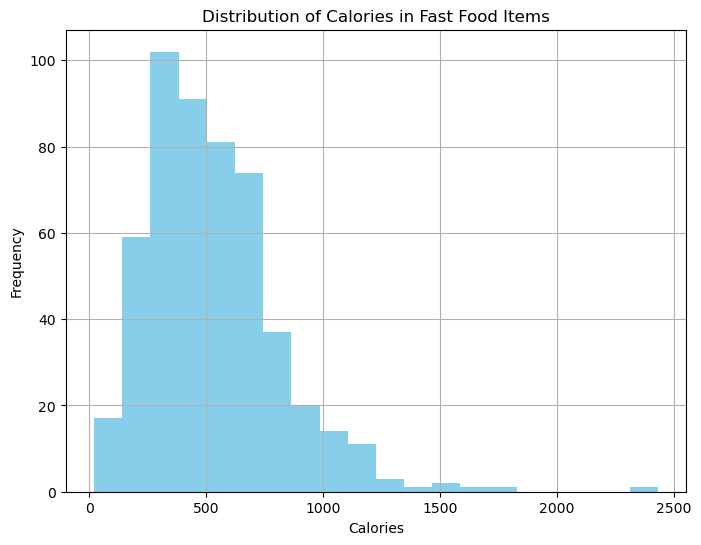

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Create a histogram to show the distribution of calories
plt.figure(figsize=(8, 6))
plt.hist(df['calories'], bins=20, color='skyblue')
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


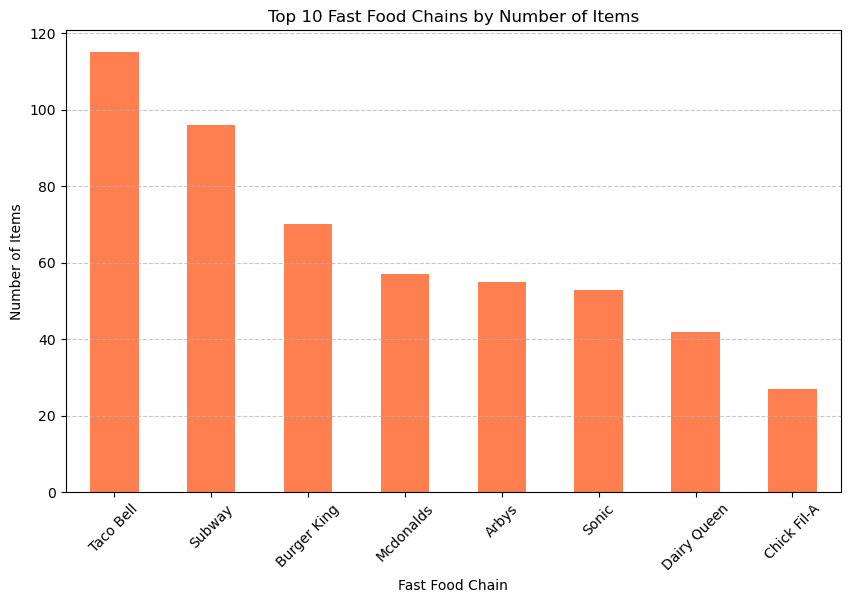

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Group the data by 'Fast Food Chain' and count the number of items for each chain
chain_counts = df['restaurant'].value_counts().head(10)

# Create a bar chart to show the top 10 fast food chains by the number of items
plt.figure(figsize=(10, 6))
chain_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Fast Food Chains by Number of Items')
plt.xlabel('Fast Food Chain')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Define a function to calculate a macro score for each item
def calculate_macro_score(row):
    # Define weights for each macronutrient (you can adjust these based on your preferences)
    protein_weight = 0.4
    carb_weight = 0.4
    fats_weight = 0.2

    # Calculate the macro score
    macro_score = (
        row['protein'] * protein_weight +
        row['total_carb'] * carb_weight +
        row['total_fat'] * fats_weight
    )
    return macro_score

# Apply the function to calculate macro scores for each item
df['Macro Score'] = df.apply(calculate_macro_score, axis=1)

# Group the data by 'Fast Food Chain' and calculate the average macro score for each restaurant
average_macro_scores = df.groupby('restaurant')['Macro Score'].mean()

# Find the restaurant with the highest average macro score
best_macros_restaurant = average_macro_scores.idxmax()

print(f"The fast food restaurant with the best macros is: {best_macros_restaurant}")


The fast food restaurant with the best macros is: Mcdonalds


In [12]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Calculate the macro score for each item (protein/calories)
df['Macro Score'] = df['protein'] / df['calories']

# Group the data by 'Fast Food Chain' and calculate the average macro score for each chain
chain_macros = df.groupby('restaurant')['Macro Score'].mean()

# Find the fast food chain with the highest average macro score
best_macros_chain = chain_macros.idxmax()
best_macros_score = chain_macros.max()

print(f"The fast food restaurant with the best macros is '{best_macros_chain}' with a macro score of {best_macros_score:.2f}.")


The fast food restaurant with the best macros is 'Chick Fil-A' with a macro score of 0.10.


In [13]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Define the columns for the factors of interest
factors_to_minimize = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'sugar']
factors_to_maximize = ['fiber', 'protein', 'vit_a', 'vit_c', 'calcium']

# Calculate the average values for the factors to minimize and maximize
average_values_minimize = df[factors_to_minimize].mean()
average_values_maximize = df[factors_to_maximize].mean()

# Find the restaurant(s) with the least average values for factors to minimize
best_macros_least = average_values_minimize.idxmin()

# Find the restaurant(s) with the highest average values for factors to maximize
best_macros_most = average_values_maximize.idxmax()

print(f"The fast food restaurant(s) with the least average values for factors to minimize are: {best_macros_least}")
print(f"The fast food restaurant(s) with the highest average values for factors to maximize are: {best_macros_most}")


The fast food restaurant(s) with the least average values for factors to minimize are: trans_fat
The fast food restaurant(s) with the highest average values for factors to maximize are: protein


In [16]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Define the nutritional factors of interest
factors_to_minimize = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'sugar']
factors_to_maximize = ['fiber', 'protein', 'vit_a', 'vit_c', 'calcium']

# Convert the restaurant names to lowercase to ensure case insensitivity
df['restaurant'] = df['restaurant'].str.lower()

# Group the data by restaurant and calculate the average values for each factor
average_values = df.groupby('restaurant')[factors_to_minimize + factors_to_maximize].mean()

# Find the restaurant(s) with the least average values for factors to minimize
best_macros_least = average_values[factors_to_minimize].idxmin()

# Find the restaurant(s) with the highest average values for factors to maximize
best_macros_most = average_values[factors_to_maximize].idxmax()

print(f"The fast food restaurant(s) with the least average values for factors to minimize are: {best_macros_least}")
print(f"The fast food restaurant(s) with the highest average values for factors to maximize are: {best_macros_most}")
print()
print()
# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Calculate the macro score for each item (protein/calories)
df['Macro Score'] = df['protein'] / df['calories']

# Group the data by 'Fast Food Chain' and calculate the average macro score for each chain
chain_macros = df.groupby('restaurant')['Macro Score'].mean()

# Find the fast food chain with the highest average macro score
best_macros_chain = chain_macros.idxmax()
best_macros_score = chain_macros.max()

print(f"The fast food restaurant with the best macros is '{best_macros_chain}' with a macro score of {best_macros_score:.2f}.")


The fast food restaurant(s) with the least average values for factors to minimize are: calories       chick fil-a
cal_fat        chick fil-a
total_fat      chick fil-a
sat_fat        chick fil-a
trans_fat      chick fil-a
cholesterol      taco bell
sodium           taco bell
total_carb     chick fil-a
sugar            taco bell
dtype: object
The fast food restaurant(s) with the highest average values for factors to maximize are: fiber         subway
protein    mcdonalds
vit_a      mcdonalds
vit_c         subway
calcium       subway
dtype: object


The fast food restaurant with the best macros is 'Chick Fil-A' with a macro score of 0.10.


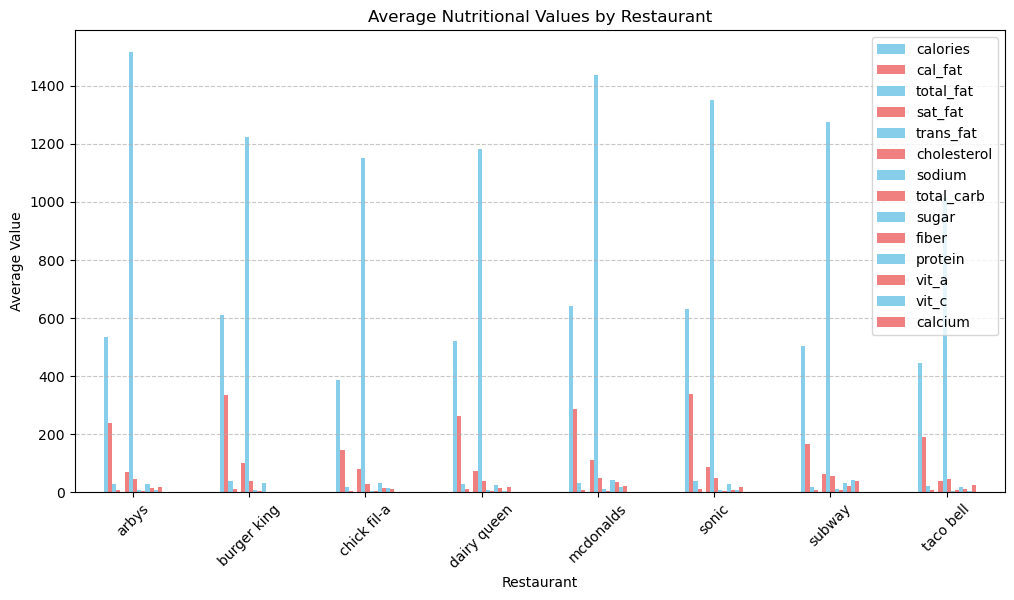

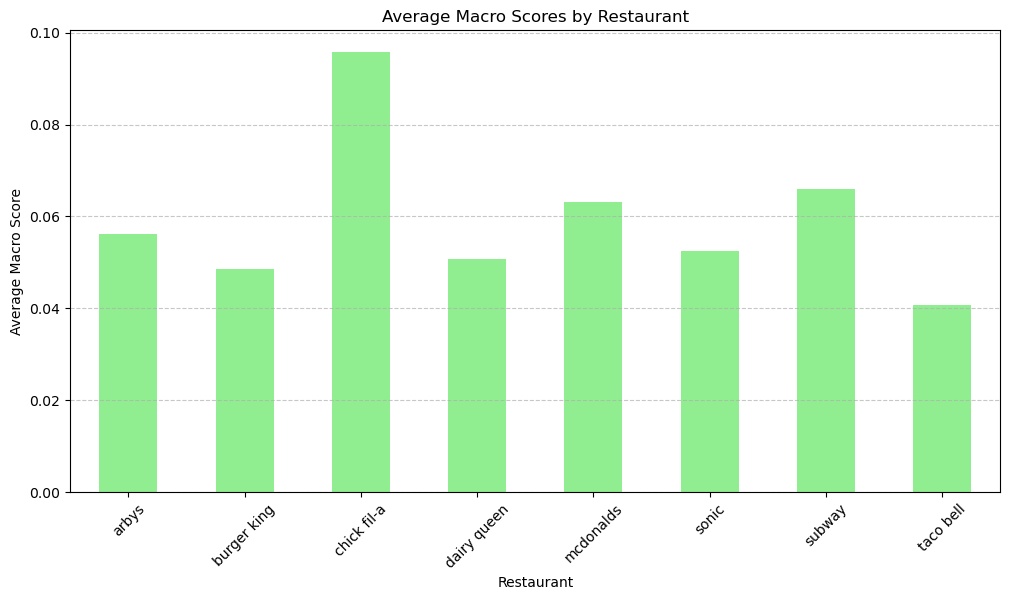

The fast food restaurant(s) with the least average values for factors to minimize are: calories       chick fil-a
cal_fat        chick fil-a
total_fat      chick fil-a
sat_fat        chick fil-a
trans_fat      chick fil-a
cholesterol      taco bell
sodium           taco bell
total_carb     chick fil-a
sugar            taco bell
dtype: object
The fast food restaurant(s) with the highest average values for factors to maximize are: fiber         subway
protein    mcdonalds
vit_a      mcdonalds
vit_c         subway
calcium       subway
dtype: object

The fast food restaurant with the best macros is 'chick fil-a' with a macro score of 0.10.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'fastfood_calories.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Define the nutritional factors of interest
factors_to_minimize = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'sugar']
factors_to_maximize = ['fiber', 'protein', 'vit_a', 'vit_c', 'calcium']

# Convert the restaurant names to lowercase to ensure case insensitivity
df['restaurant'] = df['restaurant'].str.lower()

# Group the data by restaurant and calculate the average values for each factor
average_values = df.groupby('restaurant')[factors_to_minimize + factors_to_maximize].mean()

# Find the restaurant(s) with the least average values for factors to minimize
best_macros_least = average_values[factors_to_minimize].idxmin()

# Find the restaurant(s) with the highest average values for factors to maximize
best_macros_most = average_values[factors_to_maximize].idxmax()

# Create a bar chart to visualize average values for factors to minimize and maximize
average_values.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightcoral'])
plt.title('Average Nutritional Values by Restaurant')
plt.ylabel('Average Value')
plt.xlabel('Restaurant')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate the macro score for each item (protein/calories)
df['Macro Score'] = df['protein'] / df['calories']

# Group the data by 'Fast Food Chain' and calculate the average macro score for each chain
chain_macros = df.groupby('restaurant')['Macro Score'].mean()

# Find the fast food chain with the highest average macro score
best_macros_chain = chain_macros.idxmax()
best_macros_score = chain_macros.max()

# Create a bar chart to visualize macro scores
chain_macros.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Average Macro Scores by Restaurant')
plt.ylabel('Average Macro Score')
plt.xlabel('Restaurant')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"The fast food restaurant(s) with the least average values for factors to minimize are: {best_macros_least}")
print(f"The fast food restaurant(s) with the highest average values for factors to maximize are: {best_macros_most}")
print()
print(f"The fast food restaurant with the best macros is '{best_macros_chain}' with a macro score of {best_macros_score:.2f}.")
